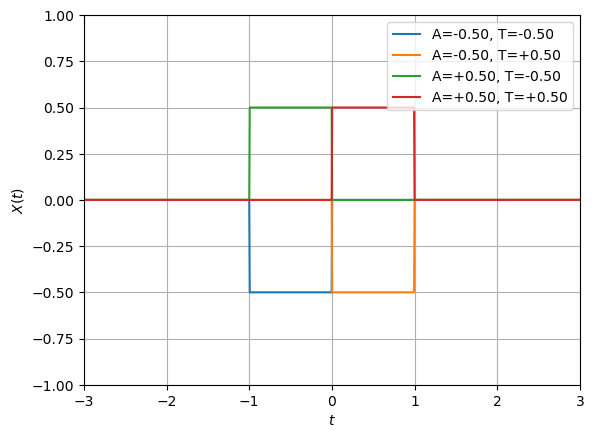

In [21]:
from matplotlib.pylab import f
import numpy as np
import matplotlib.pyplot as plt

N = 1000
Nt = 1000
t = np.linspace(-3, 3, Nt)

for A in [-1 / 2, 1 / 2]:
    for T in [-1 / 2, 1 / 2]:
        plt.plot(t, A * (abs(t - T) < 0.5), label=f"A={A:+.2f}, T={T:+.2f}")

plt.legend()
plt.ylim(-1, 1)
plt.xlim(-3, 3)
plt.xlabel("$t$")
plt.ylabel("$X(t)$")
plt.grid()
plt.show()

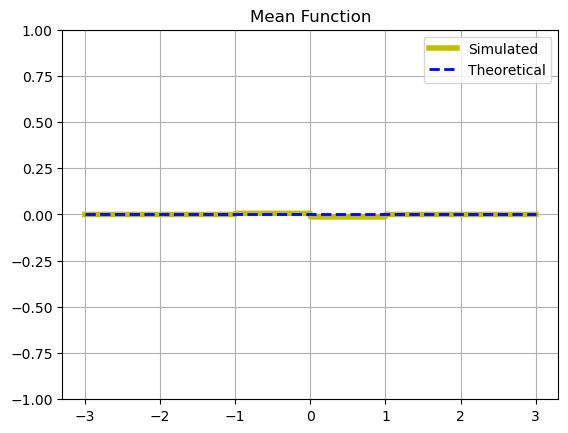

In [41]:
X = np.zeros((N, Nt))
for i in range(N):
    A = (np.random.randint(0, 2) * 2 - 1) / 2
    T = (np.random.randint(0, 2) * 2 - 1) / 2

    X[i, :] = A * (abs(t - T) < 0.5)


muX_sim = np.mean(X, axis=0)
muX_teo = np.zeros(N)

plt.figure()
plt.grid(True)
plt.plot(t, muX_sim, "y", linewidth=4, label="Simulated")
plt.plot(t, muX_teo, "b--", linewidth=2, label="Theoretical")
plt.title("Mean Function")
plt.legend()
plt.ylim(-1, 1)

plt.show()

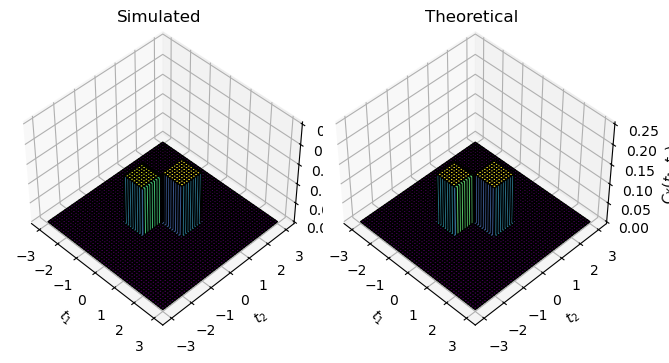

In [42]:
import numpy as np
import matplotlib.pyplot as plt

T1, T2 = np.meshgrid(t, t)

CX_sim = np.cov(X, rowvar=False)
CX_teo = 0.25 * (
    0.5 * (np.abs(T1 + 0.5) < 0.5) * (np.abs(T2 + 0.5) < 0.5)
    + 0.5 * (np.abs(T1 - 0.5) < 0.5) * (np.abs(T2 - 0.5) < 0.5)
)

fig = plt.figure()

# Simulated
ax1 = fig.add_subplot(121, projection="3d")
ax1.plot_surface(T1, T2, CX_sim, cmap="viridis", edgecolor="k")
ax1.set_xlabel("$t_1$")
ax1.set_ylabel("$t_2$")
ax1.set_zlabel("$C_X(t_1,t_2)$")
ax1.grid(True)
ax1.set_title("Simulated")
ax1.view_init(45, -45)
ax1.set_zlim([0, 0.25])

# Theoretical
ax2 = fig.add_subplot(122, projection="3d")
ax2.plot_surface(T1, T2, CX_teo, cmap="viridis", edgecolor="k")
ax2.set_xlabel("$t_1$")
ax2.set_ylabel("$t_2$")
ax2.set_zlabel("$C_X(t_1,t_2)$")
ax2.grid(True)
ax2.set_title("Theoretical")
ax2.view_init(45, -45)
ax2.set_zlim([0, 0.25])

plt.tight_layout()
plt.show()